In [6]:
import os
import sys
from PIL import Image
import glob
import pandas as pd
from torchvision import transforms
from opt import PoisonGeneration
import json
import torch
import random
from tqdm.notebook import tqdm

In [9]:
def crop_to_square(img):
    size = 256
    image_transforms = transforms.Compose(
        [
            transforms.Resize(size, interpolation=transforms.InterpolationMode.BILINEAR),
            transforms.CenterCrop(size),
        ]
    )
    return image_transforms(img)

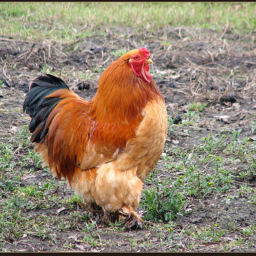

In [10]:
dir = 'data/ImageNet'
paths = glob.glob(os.path.join(dir, '*.jpeg'))
img_original = Image.open(paths[100])
img_original = crop_to_square(img_original)
img_original

c:\Users\sunwo\AppData\Local\Programs\Python\Python39\lib\site-packages\diffusers\pipelines\pipeline_loading_utils.py:219: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2-1 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
text_encoder\model.safetensors not found


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch C:\Users\sunwo\.cache\huggingface\hub\models--stabilityai--stable-diffusion-2-1\snapshots\f7f33030acc57428be85fbec092c37a78231d75a\unet: Error no file named diffusion_pytorch_model.safetensors found in directory C:\Users\sunwo\.cache\huggingface\hub\models--stabilityai--stable-diffusion-2-1\snapshots\f7f33030acc57428be85fbec092c37a78231d75a\unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch C:\Users\sunwo\.cache\huggingface\hub\models--stabilityai--stable-diffusion-2-1\snapshots\f7f33030acc57428be85fbec092c37a78231d75a\vae: Error no file named diffusion_pytorch_model.safetensors found in directory C:\Users\sunwo\.cache\huggingface\hub\models--stabilityai--stable-diffusion-2-1\snapshots\f7f33030acc57428be85fbec092c37a78231d75a\vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
c:\Users\sunwo\AppData\Local\Programs\Python\P

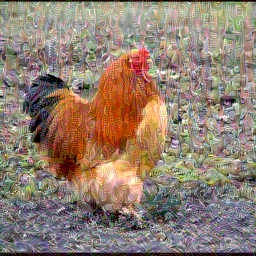

In [11]:
poison_generator = PoisonGeneration(device='cuda', eps=0.1)
with open('data/ImageNet-labels.json', 'r') as f:
    labels = json.load(f)
img_poisoned = poison_generator.generate_one(pil_image=img_original, target_concept=labels[f'{random.randint(0,999)}'])
img_poisoned

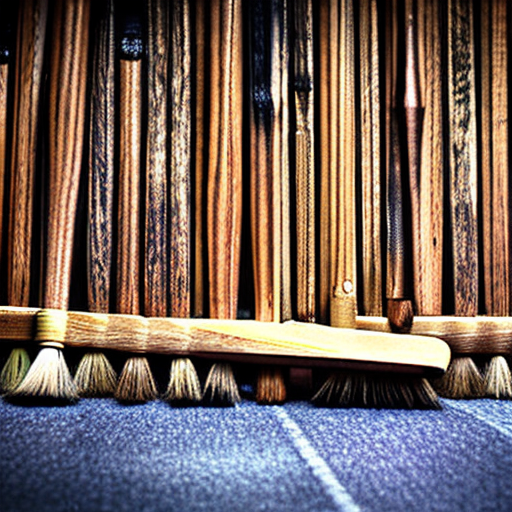

In [19]:
img_target = Image.open('temp/target.png')
img_target

In [20]:
img_original.save('example/img_original.png')
img_poisoned.save('example/img_poisoned.png')
img_target.save('example/img_target.png')